# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print(param_grad_num, ' \n\n ', grads[param_name])
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

[[-5.13764691e-01  1.67232930e-01  3.04783350e-01]
 [ 1.95077540e-02 -5.09652182e-03 -4.38074301e-03]
 [ 2.92229174e-01  1.18896894e-01 -4.32018096e-01]
 [-2.33121075e-01  1.86288200e-01  3.96198312e-02]
 [ 7.78174796e-01 -3.54233027e-01 -4.41137965e-01]
 [ 4.28331870e-03  6.65172228e-04  3.02471898e-03]
 [-6.34322094e-03 -3.62741166e-03 -6.72460447e-03]
 [ 6.17281609e-02 -1.29900489e-01  3.91825078e-02]
 [ 6.32053946e-01 -8.44023525e-02 -5.66197124e-01]
 [ 8.89334995e-01 -6.04709348e-01 -2.88551353e-01]]  

  [[-5.13764691e-01  1.67232930e-01  3.04783350e-01]
 [ 1.95077540e-02 -5.09652182e-03 -4.38074302e-03]
 [ 2.92229174e-01  1.18896894e-01 -4.32018096e-01]
 [-2.33121075e-01  1.86288200e-01  3.96198312e-02]
 [ 7.78174796e-01 -3.54233027e-01 -4.41137965e-01]
 [ 4.28331871e-03  6.65172224e-04  3.02471898e-03]
 [-6.34322094e-03 -3.62741166e-03 -6.72460448e-03]
 [ 6.17281609e-02 -1.29900489e-01  3.91825079e-02]
 [ 6.32053946e-01 -8.44023525e-02 -5.66197124e-01]
 [ 8.89334995e-01 -6.0470

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


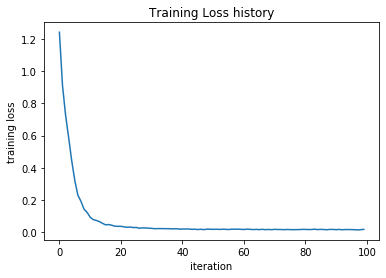

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

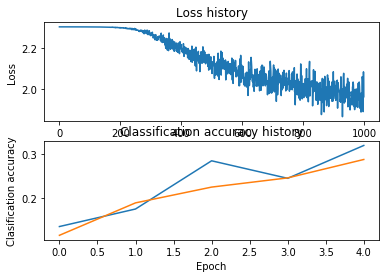

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

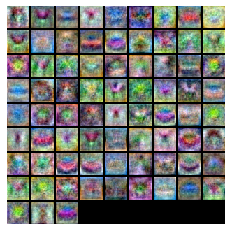

In [16]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [23]:
hidden_size = [100, 125, 150]
learning_rate =  10.0**np.random.uniform(-4,-2,5)
reg = 10.0**np.random.uniform(-4,-2,5)
print(learning_rate)
print(reg)

[0.00091641 0.00223061 0.00232051 0.00120754 0.0047596 ]
[0.00863217 0.00019468 0.0002053  0.00027611 0.00112134]


In [24]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################



best_val_acc = -1
train_acc_best = -1
best_param = None
for hs in hidden_size:
    for lr in learning_rate:
        for r in reg:
            
            print(hs, ' ', lr, ' ', r)
            input_size = 32 * 32 * 3
            hidden_size = hs
            num_classes = 10
            net = TwoLayerNet(input_size, hidden_size, num_classes)

            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=1500, batch_size=200,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg=r, verbose=True)

            # Predict on the validation set
            val_acc = (net.predict(X_val) == y_val).mean()
            train_acc = (net.predict(X_train) == y_train).mean()
            print('Validation accuracy: ', val_acc, '; train_acc_best: ',train_acc, ' ', {'hs': hs, 'lr': lr, 'r':r})
            if (val_acc > best_val_acc):
                best_val_acc = val_acc
                train_acc_best = train_acc
                best_net = net
                best_param = {'hs': hs, 'lr': lr, 'r':r}
print('BEST Validation accuracy: ', best_val_acc, '; train_acc_best: ',train_acc_best, ' ', best_param)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

100   0.0009164079698593991   0.008632167149700496
iteration 0 / 1500: loss 2.302621
iteration 100 / 1500: loss 1.871340
iteration 200 / 1500: loss 1.786133
iteration 300 / 1500: loss 1.666554
iteration 400 / 1500: loss 1.751499
iteration 500 / 1500: loss 1.515591
iteration 600 / 1500: loss 1.568266
iteration 700 / 1500: loss 1.726603
iteration 800 / 1500: loss 1.375512
iteration 900 / 1500: loss 1.402452
iteration 1000 / 1500: loss 1.280490
iteration 1100 / 1500: loss 1.467318
iteration 1200 / 1500: loss 1.354729
iteration 1300 / 1500: loss 1.221144
iteration 1400 / 1500: loss 1.362804
Validation accuracy:  0.487 ; train_acc_best:  0.5321020408163265   {'hs': 100, 'lr': 0.0009164079698593991, 'r': 0.008632167149700496}
100   0.0009164079698593991   0.00019467733902003804
iteration 0 / 1500: loss 2.302597
iteration 100 / 1500: loss 1.955478
iteration 200 / 1500: loss 1.842074
iteration 300 / 1500: loss 1.691616
iteration 400 / 1500: loss 1.603558
iteration 500 / 1500: loss 1.576806
ite

iteration 300 / 1500: loss 1.559494
iteration 400 / 1500: loss 1.895341
iteration 500 / 1500: loss 1.600597
iteration 600 / 1500: loss 1.628702
iteration 700 / 1500: loss 1.545525
iteration 800 / 1500: loss 1.499780
iteration 900 / 1500: loss 1.370356
iteration 1000 / 1500: loss 1.245854
iteration 1100 / 1500: loss 1.421831
iteration 1200 / 1500: loss 1.306886
iteration 1300 / 1500: loss 1.870718
iteration 1400 / 1500: loss 1.267574
Validation accuracy:  0.476 ; train_acc_best:  0.5193673469387755   {'hs': 100, 'lr': 0.0023205089039918894, 'r': 0.00019467733902003804}
100   0.0023205089039918894   0.00020529767638557795
iteration 0 / 1500: loss 2.302608
iteration 100 / 1500: loss 1.720356
iteration 200 / 1500: loss 1.714312
iteration 300 / 1500: loss 1.658484
iteration 400 / 1500: loss 1.495929
iteration 500 / 1500: loss 1.457451
iteration 600 / 1500: loss 1.576176
iteration 700 / 1500: loss 1.456848
iteration 800 / 1500: loss 1.620041
iteration 900 / 1500: loss 1.408745
iteration 1000

iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
Validation accuracy:  0.087 ; train_acc_best:  0.10026530612244898   {'hs': 100, 'lr': 0.004759595241495749, 'r': 0.00020529767638557795}
100   0.004759595241495749   0.0002761101903434882
iteration 0 / 1500: loss 2.302580
iteration 100 / 1500: loss 1.921626
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss inf
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
Validation accuracy:  0.087 ; train_acc_best:  0.10026530612244898   {'hs': 100, 'lr': 0.004759595241495749, 'r': 0.0002761101903434882}
100   0.004759595241495749   0.0011213355110022763
iteration 0 / 1500: loss 2.302604
iteration 100 / 1500: loss inf
iteration 200 / 

iteration 100 / 1500: loss 1.603513
iteration 200 / 1500: loss 1.822667
iteration 300 / 1500: loss 1.594480
iteration 400 / 1500: loss 1.467625
iteration 500 / 1500: loss 1.412773
iteration 600 / 1500: loss 1.418938
iteration 700 / 1500: loss 1.562737
iteration 800 / 1500: loss 1.575124
iteration 900 / 1500: loss 1.470455
iteration 1000 / 1500: loss 1.454197
iteration 1100 / 1500: loss 1.330211
iteration 1200 / 1500: loss 1.433956
iteration 1300 / 1500: loss 1.447744
iteration 1400 / 1500: loss 1.169476
Validation accuracy:  0.513 ; train_acc_best:  0.5568775510204081   {'hs': 125, 'lr': 0.002230606515702893, 'r': 0.0011213355110022763}
125   0.0023205089039918894   0.008632167149700496
iteration 0 / 1500: loss 2.302592
iteration 100 / 1500: loss 1.730875
iteration 200 / 1500: loss 1.672321
iteration 300 / 1500: loss 1.590352
iteration 400 / 1500: loss 1.746648
iteration 500 / 1500: loss 1.631009
iteration 600 / 1500: loss 1.372636
iteration 700 / 1500: loss 1.325055
iteration 800 / 15

iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
Validation accuracy:  0.087 ; train_acc_best:  0.10026530612244898   {'hs': 125, 'lr': 0.004759595241495749, 'r': 0.008632167149700496}
125   0.004759595241495749   0.00019467733902003804
iteration 0 / 1500: loss 2.302581
iteration 100 / 1500: loss inf
iteration 200 / 1500: loss inf
iteration 300 / 1500: loss inf
iteration 400 / 1500: loss inf
iteration 500 / 1500: loss inf
iteration 600 / 1500: loss inf
iteration 700 / 1500: loss inf
iteration 800 / 1500: loss inf
iteration 900 / 1500: loss inf
iteration 1000 / 1500: loss inf
iteration 1100 / 1500: loss inf
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
Validation accuracy:  0.087 ; train_acc_best:  0.100265

iteration 100 / 1500: loss 1.657893
iteration 200 / 1500: loss 1.574180
iteration 300 / 1500: loss 1.667403
iteration 400 / 1500: loss 1.569568
iteration 500 / 1500: loss 1.449024
iteration 600 / 1500: loss 1.452397
iteration 700 / 1500: loss 1.493118
iteration 800 / 1500: loss 1.425388
iteration 900 / 1500: loss 1.311970
iteration 1000 / 1500: loss 1.490955
iteration 1100 / 1500: loss 1.371110
iteration 1200 / 1500: loss 1.481639
iteration 1300 / 1500: loss 1.385379
iteration 1400 / 1500: loss 1.362753
Validation accuracy:  0.499 ; train_acc_best:  0.5566122448979591   {'hs': 150, 'lr': 0.002230606515702893, 'r': 0.00020529767638557795}
150   0.002230606515702893   0.0002761101903434882
iteration 0 / 1500: loss 2.302616
iteration 100 / 1500: loss 1.849559
iteration 200 / 1500: loss 1.542150
iteration 300 / 1500: loss 1.601949
iteration 400 / 1500: loss 1.611834
iteration 500 / 1500: loss 1.584823
iteration 600 / 1500: loss 1.485927
iteration 700 / 1500: loss 1.542030
iteration 800 / 1

iteration 500 / 1500: loss 1.507422
iteration 600 / 1500: loss 1.479150
iteration 700 / 1500: loss 1.495054
iteration 800 / 1500: loss 1.313094
iteration 900 / 1500: loss 1.354562
iteration 1000 / 1500: loss 1.378005
iteration 1100 / 1500: loss 1.330216
iteration 1200 / 1500: loss 1.283339
iteration 1300 / 1500: loss 1.147922
iteration 1400 / 1500: loss 1.296487
Validation accuracy:  0.498 ; train_acc_best:  0.5581224489795918   {'hs': 150, 'lr': 0.0012075416782361145, 'r': 0.0002761101903434882}
150   0.0012075416782361145   0.0011213355110022763
iteration 0 / 1500: loss 2.302625
iteration 100 / 1500: loss 1.853323
iteration 200 / 1500: loss 1.662123
iteration 300 / 1500: loss 1.556023
iteration 400 / 1500: loss 1.634842
iteration 500 / 1500: loss 1.557834
iteration 600 / 1500: loss 1.375525
iteration 700 / 1500: loss 1.405167
iteration 800 / 1500: loss 1.418176
iteration 900 / 1500: loss 1.413168
iteration 1000 / 1500: loss 1.267979
iteration 1100 / 1500: loss 1.288502
iteration 1200

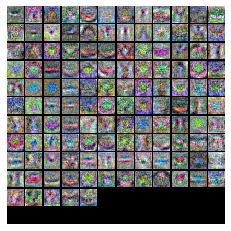

In [25]:
# visualize the weights of the best network
show_net_weights(best_net)

In [ ]:
BEST Validation accuracy:  0.497 ; train_acc_best:  0.505938775510204   {'hs': 60, 'lr': 0.002, 'r': 0.25}
BEST Validation accuracy:  0.528 ; train_acc_best:  0.5659795918367347   {'hs': 125, 'lr': 0.0012075416782361145, 'r': 0.00019467733902003804}

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [27]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.505
